# Summary
##### Yuchen Zeng, Jiantong Wang, Ruixuan Zhao, Hao Pan

## 1.  Introduction

Body fat percentage can be defined as mass of fat divided by total mass. Body fat percentage is a very important index for people to evaluate their health condition, health costs and even happiness. Though it's important, it's not easy to compute as it's impossible to get mass of fat. Folks(1956) came up an idea to estimate body fat based on body density, density of lean body tissue and density of fat tissue, which do made computation possible. Katch and McArdle (1977) and Wilmore (1976) gave an good estimation of density of lean body tissue and density of fat tissue. The only problem left is how to estimate body density, which is costly to get precise estimation.Thus, it would be great if we can come up with either a new way to estimate body fat percentage or an economical way to estimate body density.

Finally, our group built two models that can estimate body fat percentage fairly accurate with very limited body information. The first model we bulit estimates body fat percentage directly with abdomen circumference and weight. The second one estimates the reciprocal of body density to estimate body fat percentage with abdomen circumference and height

## 2. Background information

More and more people focus on their health, and one of the ways to assess health is estimating percentage of body fat.  For a long time, people used various methods to estimate the percentage of body fat. Some people use predictive equations for body fat using body circumference measurements and skin-fold measurements. For example, the "Siri's equation" is

Percentage of Body Fat = 495/density - 450

However, it is difficult for doctors to determine body volume (body density) by underwater submersion. We should find a way to determine percentage of body fat by commonly available measurements.  The dataset BodyFat.csv contains 252 records of  available measurements: age, weight, height, adiposity, neck circumference, chest circumference, abdomen circumference, hip circumference, thigh circumference, knee circumference, ankle circumference, biceps circumference, forearm circumference and wrist circumference. Also, we have density determined from underwater weighing and percentage of body fat from Siri's (1956) equation. We should use the data to construct simple and robust statistical model to predict percentage of body fat.

## 3. Data processing

In [24]:
if (!require(ggplot2)){
    install.packages("ggplot2")
    stopifnot(require(ggplot2))
}
if (!require(gridExtra)){
    install.packages("gridExtra")
    stopifnot(require(gridExtra))
}

In [26]:
bf = read.csv("./data/BodyFat.csv",sep=",")
head(bf)

IDNO,BODYFAT,DENSITY,AGE,WEIGHT,HEIGHT,ADIPOSITY,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
1,12.6,1.0708,23,154.25,67.75,23.7,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
2,6.9,1.0853,22,173.25,72.25,23.4,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
3,24.6,1.0414,22,154.00,66.25,24.7,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
4,10.9,1.0751,26,184.75,72.25,24.9,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
5,27.8,1.0340,24,184.25,71.25,25.6,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7
6,20.6,1.0502,24,210.25,74.75,26.5,39.0,104.5,94.4,107.8,66.0,42.0,25.6,35.7,30.6,18.8


First, because we already know the relationship between density and body fat percentage which is

$$ 
BodyFat = \frac{495}{Density}-450.
$$

We compared the predicted body fat which deduced from density and the input body fat and check which one is more reasonable. By this way, we could detect some potential outliers. 

In [7]:
bf$pd.bf = 495/bf$DENSITY-450; ol.bf = order(abs(bf$pd.bf-bf$BODYFAT), decreasing = TRUE)[1:5]
bf$outlier = 1:dim(bf)[1] %in% ol.bf; bf[ol.bf,c("BODYFAT","pd.bf")]

,BODYFAT,pd.bf
96,17.3,0.3684833
48,6.4,14.1350211
76,18.3,14.0915057
182,0.0,-3.6116873
216,45.1,47.4874372


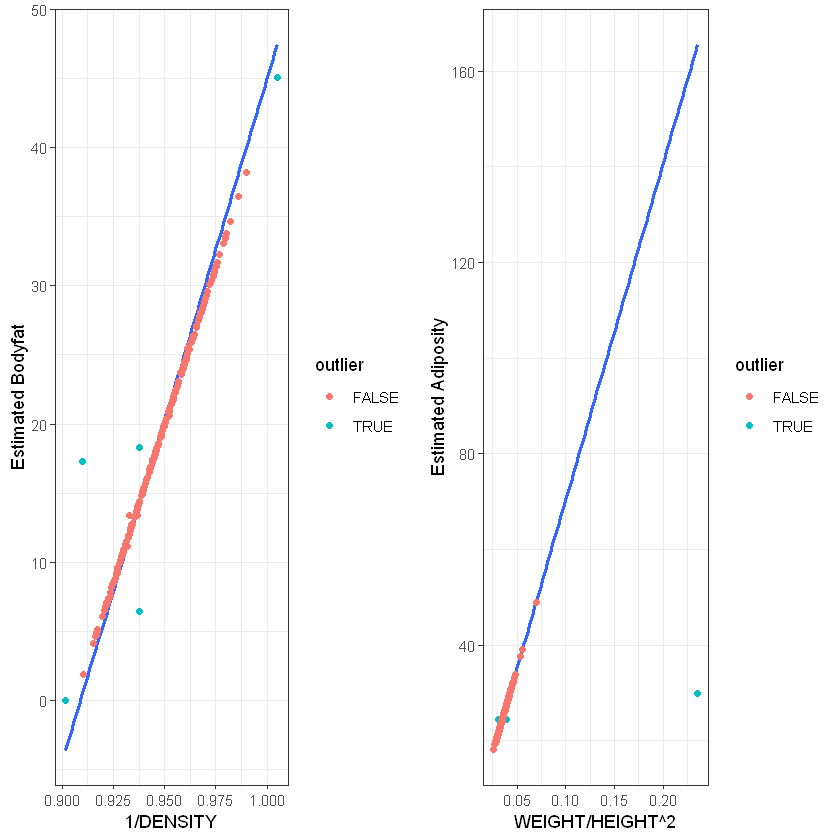

In [9]:
ol.bf = order(abs(bf$pd.bf-bf$BODYFAT), decreasing = TRUE)[1:5]
a = ggplot(data = bf, aes(x=1/DENSITY, y=pd.bf))+geom_smooth(method="lm")+
  geom_point(aes(x=1/DENSITY, y=BODYFAT, color=outlier))+ theme_bw() + labs(y = "Estimated Bodyfat")
ggsave("outlier_bf_den.pdf", a, width = 5, height = 3)

bf$pd.bmi = 0.45359237*bf$WEIGHT/(bf$HEIGHT*0.0254)^2

ol.bmi = order(abs(bf$pd.bmi-bf$ADIPOSITY), decreasing = TRUE)[1:3]
bf$outlier = 1:dim(bf)[1] %in% ol.bmi

b = ggplot(data = bf, aes(x=WEIGHT/HEIGHT^2, y=pd.bmi))+geom_smooth(method="lm")+
  geom_point(aes(x=WEIGHT/HEIGHT^2, y=ADIPOSITY, color=outlier))+ theme_bw()+labs(y= "Estimated Adiposity")

all_gp = grid.arrange(a,b,ncol=2,nrow=1)
ggsave("outlier_lm.pdf", all_gp, width = 10, height = 3)

The potential outliers are listed as above and shown in the figures above (left). Obviously, according to the 96th observation, the predicted body fat is impossible, we keep the original body fat percentage because the predicted body fat is too extreme to happen. As for 48th, 76th and 216th observation, we cannot tell which input, body fat or density is correct, so we delete them strightly. As for 182nd observation, both predicted body fat and input body fat are impossible to happen, we delete it as an outlier.

In [10]:
ol.bf = c(48,76,182,216)

Since we already know the formula to compute the adiposity by using weight and height, we use the weight and height to calculate the adiposity.
$$
adiposity = \frac{0.4547*weight}{(height*0.025)^2}
$$

In [11]:
bf$pd.bmi = 0.45359237*bf$WEIGHT/(bf$HEIGHT*0.0254)^2
ol.bmi = order(abs(bf$pd.bmi-bf$ADIPOSITY), decreasing = TRUE)[1:3]
bf$outlier = 1:dim(bf)[1] %in% ol.bmi; bf[ol.bmi,c("ADIPOSITY","pd.bmi","WEIGHT","HEIGHT")]

,ADIPOSITY,pd.bmi,WEIGHT,HEIGHT
42,29.9,165.61823,205.00,29.50
163,24.4,27.40693,184.25,68.75
221,24.5,21.67807,153.25,70.50


The potential outlier detected in this way is shown as the table and figure (right) above.  Noticed the estimated adiposity of the 42rd sample is apparently problematic. So we took a further look at this sample, and found the extremely short height. We use known adiposity to estimate the height 69.45 and replace the original data. As for 163rd and 221st samples, we cannot tell which element is problematic, so we delete these two observations. 

In [12]:
ol.bmi = c(163,221);bf[42,"HEIGHT"] = 69.45;bf1 = bf[-c(ol.bf,ol.bmi), c(2,4:17)]

Now look at the boxplot to see other potential outliers.

Loading required package: grid


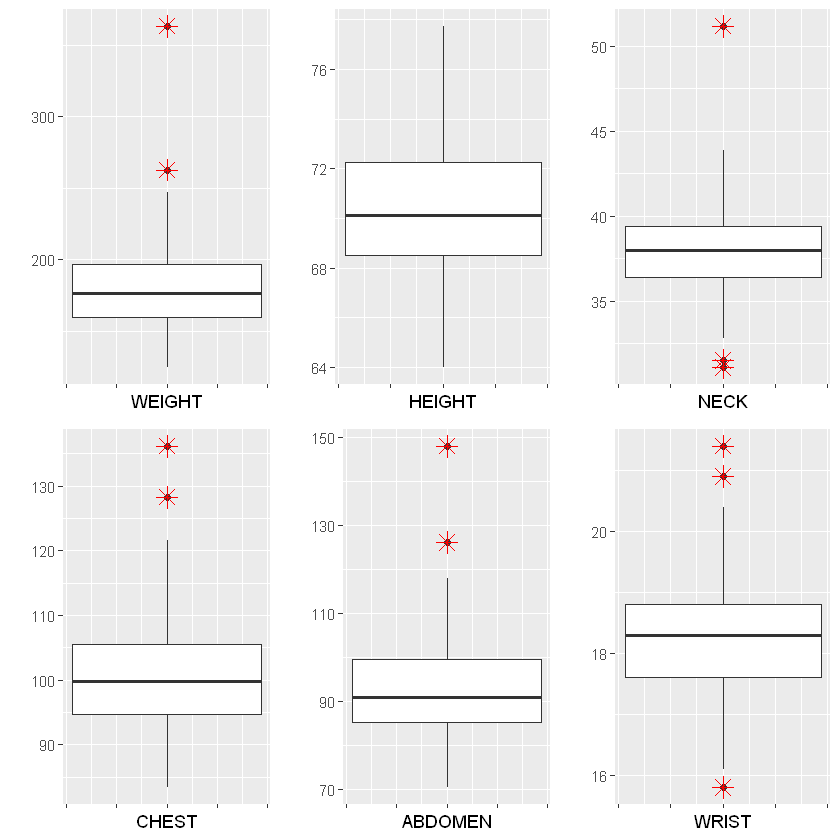

In [13]:
require(grid)

a = ggplot(bf1, aes(y=WEIGHT)) + 
  geom_boxplot()+ 
  geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)+ 
  theme(axis.text.x = element_blank())+
  labs(x = "WEIGHT", y = "")

b = ggplot(bf1, aes(y=HEIGHT)) + 
  geom_boxplot()+ 
  geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)+ 
  theme(axis.text.x = element_blank())+
  labs(x = "HEIGHT", y = "")

c = ggplot(bf1, aes(y=NECK)) + 
  geom_boxplot()+ 
  geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)+ 
  theme(axis.text.x = element_blank())+
  labs(x = "NECK", y = "")

d = ggplot(bf1, aes(y=CHEST)) + 
  geom_boxplot()+ 
  geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)+ 
  theme(axis.text.x = element_blank())+
  labs(x = "CHEST", y = "")

e = ggplot(bf1, aes(y=ABDOMEN)) + 
  geom_boxplot()+ 
  geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)+ 
  theme(axis.text.x = element_blank())+
  labs(x = "ABDOMEN", y = "")

f = ggplot(bf1, aes(y=WRIST)) + 
  geom_boxplot()+ 
  geom_boxplot(outlier.colour="red", outlier.shape=8, outlier.size=4)+ 
  theme(axis.text.x = element_blank())+
  labs(x = "WRIST", y = "")
  
grid.newpage()
pushViewport(viewport(layout = grid.layout(2,3)))
vplayout = function(x,y){
  viewport(layout.pos.row = x, layout.pos.col = y)
}

print(a,vp = vplayout(1,1))
print(b,vp = vplayout(1,2))
print(c,vp = vplayout(1,3))
print(d,vp = vplayout(2,1))
print(e,vp = vplayout(2,2))
print(f,vp = vplayout(2,3))

These points all are potential outliers, but looking into the samples, we cannot delete them curtly.

## 4. Model motivation and selection

We came up with 3 idea to fit our model, the following part is how we fit and choose the models.

### Model 1

We borrowed some idea from US Army, they have a formula for men to calculate body fat, it is like this:  

$$
Body~Fat \sim \log{(Waist - Neck)} + \log{(Height)}
$$

We borrowed this idea. But we don't have data of waist, but we thought abdomen is not much differenrt from waist, so we just used abdomen instead of waist.

In [15]:
model_Army <- lm(BODYFAT ~ log(ABDOMEN - NECK) + log(HEIGHT),data=bf1)

From the results, we can get the adjusted R square is 0.7179, which is ideal. But the model requires 3 variables as input. It is kind or more complex than model_Tsuna. So we tried to dismiss NECK in our model, and see what would happen.

In [16]:
model_1 <- lm(BODYFAT ~ log(ABDOMEN) + log(HEIGHT),data=bf1)

From the result above, we could see that although we exclude Neck from our model, but the results are not getting so much worse. The adjusted R square is 0.6971, which is also fairly acceptable. So we just exclude Neck from our model.

However for each of the three models, point 39 seems to be a leverage point and if you take a glance on data of 39, you would also consider 39 as an outlier.

### Model 2

For we already know that body fat is calculated by the body density, so our aim could be try to fit a model to predict density.  

We came up with two solutions:  

Solution from Hao:  Roughly, a guy could be regard as a cylinder, so a guy's density could roughly be drecribed as:

$$
\begin{aligned}
\rho &= \frac{Weight}{Volume}=\frac{Weight}{Height\times Area}=\frac{Weight}{(Height)^2}\times \frac{Height}{\pi R^2}\\
&=BMI\times\frac{Height}{\pi\times(\frac{Abdomen}{4\pi})^2}\\
\end{aligned}
$$

And we could find that there is a linear relationship between BMI and Abdomen, so we could fit a regression for BMI on abdomen.

In [17]:
model_BMI_ABDOMEN <- lm(ADIPOSITY ~ ABDOMEN,data = bf1)
bf1$h_1 = 1/(bf1$HEIGHT);bf1$dh_1 = 1/(bf1$ABDOMEN * bf1$HEIGHT);bf1$d_h1 = bf1$ABDOMEN / bf1$HEIGHT
model_Tsuna_V1 <- lm(BODYFAT ~ dh_1 + d_h1 + h_1,data=bf1)

Then we could use abdomen to represent BMI, and further simplify our formula: 

$$
\begin{aligned}
&\rho=(k\times Abdomen +b) \frac{Height}{\frac{(Abdomen)^2}{16\pi}}\\
& \frac{1}{\rho}=\frac{\frac{1}{16\pi}\times(Abdomen)^2}{(k\times Abdomen+b)Height}\\
& \frac{1}{\rho}=\frac{1}{16\pi k^2}[\frac{(k\times Abdomen+b)}{Height}+\frac{b^2}{(k\times Abdomen+b)Height}-\frac{2b}{Height}]\\
&Body~fat\sim \frac{1}{\rho} \sim \frac{(k\times Abdomen+b)}{Height}+\frac{b^2}{(k\times Abdomen+b)Height}-\frac{2b}{Height}
\end{aligned}
$$

For $(k\times Abdomen+b)$, is BMI based on the relationship with Abdomen. So we named it as BMI.Abdomen. I also tried just simply use adoposity here, but the adjusted R square is smaller than use abdomen here.  

In [18]:
bf1$BMI.ABDOMEN <- 0.308909*bf1$ABDOMEN - 3.162932;bf1$HEIGHT.CM <- bf1$HEIGHT * 2.54
bf1$h_2 = 1/(bf1$HEIGHT.CM);bf1$dh_2 = 1/(bf1$BMI.ABDOMEN * bf1$HEIGHT.CM);bf1$d_h2 = bf1$BMI.ABDOMEN / bf1$HEIGHT.CM
model_Tsuna_V2 <- lm(BODYFAT ~ dh_2 + d_h2 + h_2,data = bf1)

bf1$h_3 = 1/(bf1$HEIGHT.CM);bf1$dh_3 = 1/(bf1$ADIPOSITY * bf1$HEIGHT.CM);bf1$d_h3 = bf1$ADIPOSITY / bf1$HEIGHT.CM
model_Tsuna_V3 <- lm(BODYFAT ~ dh_3 + d_h3 + h_3, data = bf1)

Here, we found that the adjusted R-square of model using Adiposity is smaller than model using Abdomen. I think it is kind of caused by that the Adiposity is reied on many other datas, which may accumulate the variances. So just use Abdomen instead of adiposity.
Also, we could also try to just ignore the transformation and simply run a regression like this:  
$$
BODYFAT \sim \frac{1}{HEIGHT}+ \frac{1}{ABDOMEN\times HEIGHT} + \frac{ABDOMEN}{HEIGHT} 
$$

### Model 3

In [19]:
exhaus = read.csv("./data/step_result.csv");exhaus[c(1,14,15,16,105,106),]

,X,mindex,n,predictors,rsquare,adjr,predrsq,cp,aic,sbic,sbc,msep,fpe,apc,hsp
1,7,1,1,ABDOMEN,6.478017e-01,0.646358275,0.63726116,73.97764,1438.179,739.0771,1448.695,20.09186,20.09053,0.3579720,0.08201031
14,3,14,1,HEIGHT,2.208779e-07,-0.004098139,-0.01819175,655.15815,1694.895,992.8202,1705.411,57.04700,57.04321,1.0163932,0.23285262
15,32,15,2,WEIGHT ABDOMEN,7.080663e-01,0.705663519,0.69825412,21.91079,1394.013,695.5229,1408.034,16.79158,16.78880,0.2991420,0.06853935
16,84,16,2,ABDOMEN WRIST,6.868582e-01,0.684280881,0.67479081,40.93780,1411.264,712.3695,1425.286,18.01144,18.00845,0.3208737,0.07351852
105,47,105,2,HEIGHT ANKLE,7.842930e-02,0.070844354,0.04108944,586.79485,1676.803,973.4830,1690.824,53.00734,52.99854,0.9443255,0.21636367
106,228,106,3,WEIGHT ABDOMEN WRIST,7.154836e-01,0.711956570,0.70221087,17.25624,1389.681,691.2710,1407.208,16.50076,16.49583,0.2939219,0.06735226


In [22]:
model_OP <- lm(BODYFAT ~ ABDOMEN + WEIGHT, data = bf1)

By using exhaustion method to listing all possible linear models, we found the model using weight and abdomen as predictors is not only simple but also fit our data fairly well. Looking at the single-variable linear model, the one that performs best is using abdomen as predictor with R square equal to 0.65. And the one which perfroms best using two variables is taking weight and abdomen as predictors. The R square has been improved by about 0.06. However, as weight is a commonly used measurement that almost everyone knew their weight, adding weight as a predictor is good way to improve the accuracy of our model. According to the table above, if we still want to add a new predictor, wrist would be the best choice. However, the R square can only be improved by less than 0.01. So we select $bodyfat\sim abdomen+weight$ as the best linear model.

### Detect outliers

We use three criterions (leverage, diffit and cook's distance) to find the potential outliers. 

We look into the 39th observation and find this individual is a extreme sample. Deleting it would not affect the prediction of our model on common individuals. So we remove it from our dataset.

In [11]:
bf1 = bf1[-39,]

### Model performance comparision

In [12]:
source('./code/mse_cross_validation.R'); jw = summary(model_Army)
cat("Model 1: ");MSE_Cal(BODYFAT~log(HEIGHT)+log(ABDOMEN), fold = 10, data = bf1)

Model 1: BODYFAT ~ log(HEIGHT) + log(ABDOMEN)


MSE_mean,MSE_SD
3.976253,0.5821541


In [13]:
data.frame("Adjusted R square" = jw$adj.r.squared, "Residual Standard error" = jw$r.squared , "F-statistic" = jw$fstatistic[1])

,Adjusted.R.square,Residual.Standard.error,F.statistic
value,0.7178796,0.7201827,312.7118


In [14]:
ph = summary(model_Tsuna_V1)
cat("Model 2: "); MSE_Cal(BODYFAT ~ dh_1 + d_h1 + h_1, fold = 10, data = bf1)

Model 2: BODYFAT ~ dh_1 + d_h1 + h_1


MSE_mean,MSE_SD
4.388183,0.5427402


In [15]:
data.frame("Adjusted R square" = ph$adj.r.squared, "Residual Standard error" = 4.069 , "F-statistic" = ph$fstatistic[1])

,Adjusted.R.square,Residual.Standard.error,F.statistic
value,0.702954,4.069,194.2627


In [16]:
zyc = summary(model_1)
cat("Model 3: "); MSE_Cal(BODYFAT ~ ABDOMEN + WEIGHT, fold = 10, data = bf1)

Model 3: BODYFAT ~ ABDOMEN + WEIGHT


MSE_mean,MSE_SD
4.206247,0.5256041


In [17]:
data.frame("Adjusted R square" = zyc$adj.r.squared, "Residual Standard error" = 4.016 , "F-statistic" = zyc$fstatistic[1])

,Adjusted.R.square,Residual.Standard.error,F.statistic
value,0.6970823,4.016,282.9002


From the results, we could find Model 2 and Model 3 are slightly better than Model1 due to slightly lower standard error of MSE. So
we adopt Model 2 and Model 3. In this way, one can choose to input abdomen and height, or abdomen and weight to compute
body fat. Our shiny will compute estimated body fat percentage based on what's input.

## 5. Model intepretation

### Model diagnostics

From the diagnostics plot, we could see the two models fit well. The residual follows a normal distribution and costant variance assumption holds.

## 6. Conclusion

After deleting 39th observation, our final proposed models to predict bodyfat% are: 
$$
Bodyfat = -21.62 + \frac{248324.17}{Abdomen\times Height}+15.97\frac{Abdomen}{Height} + \frac{4095.9}{Height}
$$

And 
$$
Bodyfat = -41.96048 + 0.89851Abdomen - 0.12384Weight
$$

**Model Interpretations:**

Model (1) implies that, how will a man's body fat percentage change rely not only on his height, but also on his current Abdomen, i.e., the relationship between body fat percentage and abdomen is non-linear. For example, if a man with an abdomen circumference of 85 cms and a height of 65 inches, his body fat percentage will increase by about 3.93% (7.19%), if his abdomen circumference grows by 5 (10) cms. 

Model (2) implies that, on average, a man's body fat percentage will increase by 8.99% if his abdomen circumference grows by 10 cms and his body fat percentage will increase by 1.24% if he gains 10 lbs.

**Strength**: 
The model we use is quite simple, which only requires two variables as input but gives a fairly good R square. Moreover, it also provides us some flexibility that you can either input abdomen and height or abdomen and weight.

**Weakness**: 
The confidence interval is kind of wide.

## 7. Contribution
- **Jiantong Wang:** Data preprocessing, Model 1, Model 3, Model selection, Summary writing
- **Ruixuan Zhao :** Data preprocessing, Model 2, Slides design, Summary writing
- **Yuchen Zeng  :** Data preprocessing, Model 2, Model selection, Summary writing, Shinny design, Github organization
- **Hao Pan      :** Data preprocessing, Model 3, Slides design, Summary writing